In [8]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
def create_placeholders():
    X=tf.placeholder(tf.float32,[None,28,28,1])
    Y=tf.placeholder(tf.float32,[None,10])
    return X,Y

In [49]:
def make_params():
    w1=tf.get_variable('w1',[5,5,1,16],initializer=tf.contrib.layers.xavier_initializer(seed=0))
    w2=tf.get_variable('w2',[5,5,16,32],initializer=tf.contrib.layers.xavier_initializer(seed=0))
    w3=tf.get_variable('w3',[5,5,32,64],initializer=tf.contrib.layers.xavier_initializer(seed=0))
    parameters={'w1':w1,'w2':w2,'w3':w3}
    return parameters

In [50]:
def for_prop(xtr,params):
    w1=params['w1']
    w2=params['w2']
    w3=params['w3']
    nx=xtr
    nx=tf.nn.conv2d(nx,w1,strides=[1,1,1,1],padding='SAME')
    nx=tf.nn.relu(nx)
    nx=tf.nn.max_pool(nx,ksize=[1,3,3,1],strides=[1,1,1,1],padding='VALID')
    nx=tf.nn.conv2d(nx,w2,strides=[1,1,1,1],padding='VALID')
    nx=tf.nn.relu(nx)
    nx=tf.nn.max_pool(nx,ksize=[1,3,3,1],strides=[1,1,1,1],padding='VALID')
    nx=tf.nn.conv2d(nx,w3,strides=[1,1,1,1],padding='VALID')
    nx=tf.nn.relu(nx)
    nx=tf.nn.max_pool(nx,ksize=[1,3,3,1],strides=[1,1,1,1],padding='VALID')
    nx=tf.contrib.layers.flatten(nx)
    nx=tf.contrib.layers.fully_connected(nx,10,activation_fn=None)
    return nx

In [51]:
def compute_cost(logits,labels):
    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    return cost

In [52]:
def random_mini_batches(xtr,ytr,mbs):
    m=xtr.shape[0]
    perm=list(np.random.permutation(m))
    xtr=xtr[perm,:,:,:]
    ytr=ytr[perm,:]
    num_tot_mb=m//mbs
    minibatches=[]
    for i in range(num_tot_mb):
        mbx=xtr[i*mbs:(i+1)*mbs,:,:,:]
        mby=ytr[i*mbs:(i+1)*mbs,:]
        mb=(mbx,mby)
        minibatches.append(mb)
    if m%mbs!=0:
        mbx=xtr[num_tot_mb*mbs:m,:,:,:]
        mby=ytr[num_tot_mb*mbs:m,:]
        mb=(mbx,mby)
        minibatches.append(mb)
    return minibatches

In [53]:
def accuracy(zf,ytr):
    y_pred=np.argmax(zf,axis=1)
    acc=np.mean(y_pred==ytr)
    return acc

In [63]:
def train(xtr,ytr,epochs=5,lr=0.001,batch_size=64):
    X,Y=create_placeholders()
    params=make_params()
    zf=for_prop(X,params)
    cost=compute_cost(zf,Y)
    optimizer=tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)
    init=tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        costs=[]
        for i in range(epochs):
            epoch_cost=0
            minibatches=random_mini_batches(xtr,ytr,batch_size)
            m=xtr.shape[0]
            num_tot_mb=m//batch_size
            for mb in minibatches:
                mbx,mby=mb
                _,c=sess.run([optimizer,cost],feed_dict={X:mbx,Y:mby})
                epoch_cost+=c/num_tot_mb
            costs.append(epoch_cost)
            print('cost after epoch '+str(i)+':'+str(epoch_cost))
    plt.plot(np.squeeze(costs))
    plt.xlabel('epochs in 5s')
    plt.ylabel('cost')
    plt.title('cost vs epochs')    
    return(params)

In [15]:
df=pd.read_csv('./datasets/fashion-mnist_train.csv')
train_data=df.as_matrix()
xtr=train_data[:,1::]
ytr=train_data[:,0].reshape(60000,1)
print(xtr.shape)
print(ytr.shape)
xtr=xtr.reshape(60000,28,28,1)
print(xtr.shape)
ytroh=tf.one_hot(ytr,10,axis=1)
with tf.Session() as sess:
    ytroh=sess.run(ytroh).reshape(60000,10)
print(ytroh.shape)

(60000, 784)
(60000, 1)
(60000, 28, 28, 1)
(60000, 10)


cost after epoch 0:1.0323704971575045
cost after epoch 1:0.4118938554662779
cost after epoch 2:0.3778229489874809
cost after epoch 3:0.3603040327495928
cost after epoch 4:0.3496735240775091


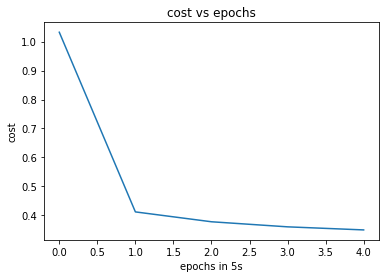

In [64]:
tf.reset_default_graph()
params=train(xtr,ytroh)

In [65]:
X=tf.placeholder(tf.float32,[None,28,28,1])
zf=for_prop(X,params)
with tf.Session() as sess:
    zf=sess.run(zf,feed_dict={X:xtr})
acc=accuracy(zf,ytr)
print(acc)

FailedPreconditionError: Attempting to use uninitialized value w1
	 [[Node: w1/read = Identity[T=DT_FLOAT, _class=["loc:@w1"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](w1)]]
	 [[Node: fully_connected_1/BiasAdd/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_42_fully_connected_1/BiasAdd", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'w1/read', defined at:
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-64-73e53036e6f2>", line 2, in <module>
    params=train(xtr,ytroh)
  File "<ipython-input-63-3b5a0a574fc3>", line 3, in train
    params=make_params()
  File "<ipython-input-49-a02c8705c274>", line 2, in make_params
    w1=tf.get_variable('w1',[5,5,1,16],initializer=tf.contrib.layers.xavier_initializer(seed=0))
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1297, in get_variable
    constraint=constraint)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1093, in get_variable
    constraint=constraint)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 439, in get_variable
    constraint=constraint)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 408, in _true_getter
    use_resource=use_resource, constraint=constraint)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 800, in _get_single_variable
    use_resource=use_resource)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2157, in variable
    use_resource=use_resource)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2147, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2130, in default_variable_creator
    constraint=constraint)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\variables.py", line 233, in __init__
    constraint=constraint)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\variables.py", line 381, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\array_ops.py", line 131, in identity
    return gen_array_ops.identity(input, name=name)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 2656, in identity
    "Identity", input=input, name=name)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 3271, in create_op
    op_def=op_def)
  File "C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value w1
	 [[Node: w1/read = Identity[T=DT_FLOAT, _class=["loc:@w1"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](w1)]]
	 [[Node: fully_connected_1/BiasAdd/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_42_fully_connected_1/BiasAdd", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
